In [56]:
from itertools import product
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from scaling.utils import (
    get_pareto_frontier, 
    get_final_points_from_curve_set, 
    fit_linear_model,
    functional_form_chin3,
    fit_parametric_form,
)
from scaling.visualize import visualize_train_curves, plot_line_fit

In [57]:
misfitting_df = pd.read_csv(
    "../data/misfitting_results.csv"
)
misfitting_df.head()


,loss,C4 Eval Loss,N,N_no_emb,D,C,C_no_emb,C_6ND,C_6ND_no_emb,portion_steps_elapsed,model,train_tokens,total_steps,current_steps,total_epochs,current_epoch,peak_lr,sweep
0,5.939757,5.939757,93940416,35842752,134217728,75650815224446976,28864396439322624,75650815217369088,28864396432244736,0.008,misfitting_35m,134217728,16000,128,125,1,0.002,2024_11_26-18_49_27_sweep_test
1,5.076596,5.076596,93940416,35842752,268435456,151301630441816064,57728792871567360,151301630434738176,57728792864489472,0.016,misfitting_35m,268435456,16000,256,125,2,0.002,2024_11_26-18_49_27_sweep_test
2,4.514407,4.514407,93940416,35842752,402653184,226952445659185152,86593189303812096,226952445652107264,86593189296734208,0.024,misfitting_35m,402653184,16000,384,125,3,0.002,2024_11_26-18_49_27_sweep_test
3,4.252276,4.252276,93940416,35842752,536870912,302603260876554240,115457585736056832,302603260869476352,115457585728978944,0.032,misfitting_35m,536870912,16000,512,125,4,0.002,2024_11_26-18_49_27_sweep_test
4,4.115552,4.115552,93940416,35842752,671088640,378254076093923328,144321982168301568,378254076086845440,144321982161223680,0.040,misfitting_35m,671088640,16000,640,125,5,0.002,2024_11_26-18_49_27_sweep_test


In [58]:
misfitting_df = misfitting_df.astype({
    "C": "float",
})

In [59]:
unique_col_list = ["sweep"]
y_col = "loss"
x_col = "C"  # "D"
misfitting_df = misfitting_df[misfitting_df['C'] > 1e18]

<Figure size 640x480 with 0 Axes>

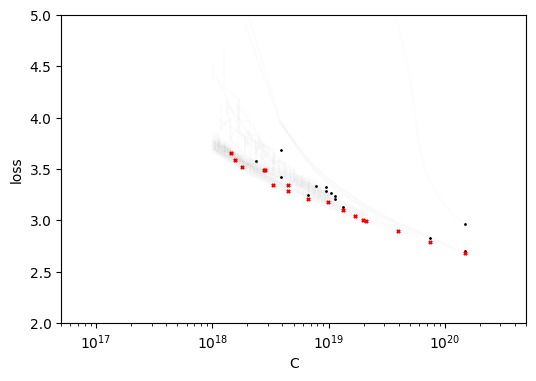

In [60]:
plt.clf()
fig, ax = plt.subplots(figsize=(6, 4))

visualize_train_curves(
    ax, 
    misfitting_df,
    unique_col_list,
    x_col=x_col,
    y_col=y_col,
    plot_all_curves=True,
    plot_final=True,
    plot_pareto_final=True,
    ylims=(2., 5),
    xlims=(5e16, 5e20),
    xlog=True
)

[]

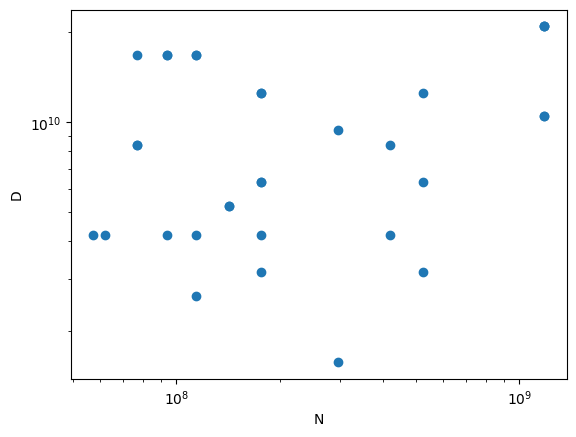

In [61]:
_final_df = get_final_points_from_curve_set(
    misfitting_df,
    unique_col_list,
    x_col=x_col,
    y_col=y_col,
    get_pareto=False
)

fig, ax = plt.subplots();
ax.scatter(
    _final_df["N"],
    _final_df["D"],
)
ax.set_xlabel("N")
ax.set_ylabel("D")
ax.loglog()

<Figure size 640x480 with 0 Axes>

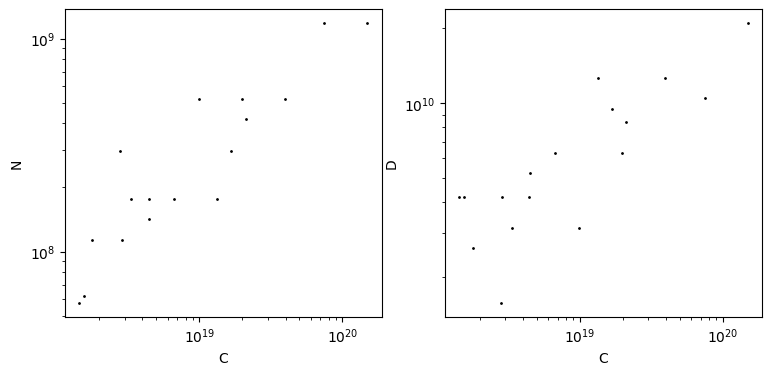

In [62]:
_pareto_df = get_final_points_from_curve_set(
    misfitting_df,
    unique_col_list,
    x_col=x_col,
    y_col=y_col,
    get_pareto=True
)

plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

visualize_train_curves(
    ax[0],
    _pareto_df,
    unique_col_list,
    x_col=x_col,
    y_col="N",
    plot_all_curves=False,
    plot_final=True,
    plot_pareto_final=False,
    xlog=True,
    ylog=True,
)

visualize_train_curves(
    ax[1],
    _pareto_df,
    unique_col_list,
    x_col=x_col,
    y_col="D",
    plot_all_curves=False,
    plot_final=True,
    plot_pareto_final=False,
    xlog=True,
    ylog=True,
)


Slope: 0.5969556371356761, Intercept: -6.691834001681865, R^2: 0.8295926342717276
Slope: 0.403044362865278, Intercept: 4.900074532410333, R^2: 0.6893646396152397
Slope: -0.0657008161135247, Intercept: 4.026594405096823, R^2: 0.9865235084121372


Text(0, 0.5, 'loss')

<Figure size 640x480 with 0 Axes>

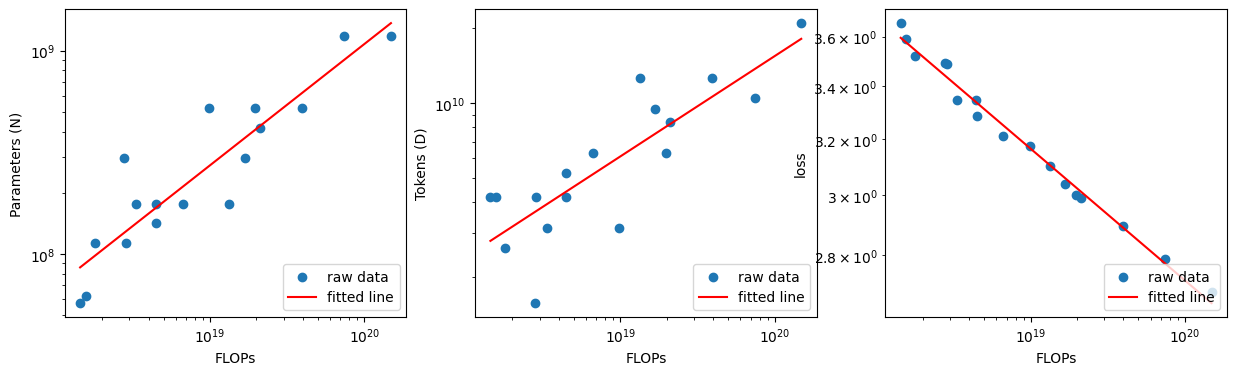

In [63]:
# Visualizing scaling law linear fit for C vs N, D, L

plt.clf();
fig, ax = plt.subplots(1, 3, figsize=(15, 4));

# C vs N

X = _pareto_df[x_col].values
Y = _pareto_df["N"].values
slope, intercept, r_value, p_value, std_err = fit_linear_model(X, Y)
print(f"Slope: {slope}, Intercept: {intercept}, R^2: {r_value**2}")

plot_line_fit(
    ax[0],
    X,
    Y,
    slope,
    intercept,
)
ax[0].set_xlabel("FLOPs")
ax[0].set_ylabel("Parameters (N)")


# C vs D

X = _pareto_df[x_col].values
Y = _pareto_df["D"].values
slope, intercept, r_value, p_value, std_err = fit_linear_model(X, Y)
print(f"Slope: {slope}, Intercept: {intercept}, R^2: {r_value**2}")

plot_line_fit(
    ax[1],
    X,
    Y,
    slope,
    intercept,
)
ax[1].set_xlabel("FLOPs")
ax[1].set_ylabel("Tokens (D)")

# C vs Loss

X = _pareto_df[x_col].values
Y = _pareto_df[y_col].values
slope, intercept, r_value, p_value, std_err = fit_linear_model(X, Y)
print(f"Slope: {slope}, Intercept: {intercept}, R^2: {r_value**2}")

plot_line_fit(
    ax[2],
    X,
    Y,
    slope,
    intercept,
)
ax[2].set_xlabel("FLOPs")
ax[2].set_ylabel(y_col)

# Approach 3

In [64]:
df = get_final_points_from_curve_set(
    misfitting_df,
    unique_col_list,
    x_col="C",
    y_col="loss",
    get_pareto=False,
)

N = df["N"].values
_D = df["D"].values
y = df["loss"].values

_df = pd.DataFrame.from_dict({
    "N": N,
    "D": _D,
    "Loss": y
}).groupby(by=["N", "D"]).min().reset_index()
_df.sort_values(by=["N", "D"], inplace=True)

data_X = _df[["N", "D"]].values
data_y = _df["Loss"].values

In [65]:
initialization = list(product(
    [0, 5, 10, 15, 20, 25],  # a
    [0, 0.5, 1.0, 1.5, 2.0],  # alpha
    [0, 5, 10, 15, 20, 25],  # b
    [0, 0.5, 1.0, 1.5, 2.0],  # beta
    [-1, -0.5, 0, 0.5, 1]  # e
))

In [66]:
best_params, best_loss = fit_parametric_form(
    functional_form_chin3,
    data_X, 
    data_y, 
    initialization
)

print(f"Best Loss: {best_loss}")
print(f"a: {best_params[0]}, alpha={best_params[1]}\nb: {best_params[2]}, beta={best_params[3]}\ne={best_params[4]}")

/Users/hogj/Documents/scaling_laws/EffingScaling/scaling/utils.py:233: RuntimeWarning: overflow encountered in exp
  L = np.exp(a - alpha * np.log(N)) + np.exp(b - beta * np.log(D)) + np.exp(e)
/Users/hogj/miniconda3/envs/scaling-notebook/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


Best Loss: 0.0005728767908003386
a: 5.72258672032311, alpha=0.31271414280353504
b: 11.07942417714425, beta=0.5386608354615576
e=0.7347001578350892


In [67]:
_a, alpha, _b, beta, _e = best_params

A = np.exp(_a)
B = np.exp(_b)
E = np.exp(_e)

a = beta / (alpha + beta)
b = alpha / (alpha + beta)

print(a, b)

G = ((alpha*A) / (beta*B)) ** (1 / (alpha + beta))
print(G)

0.6326951686543867 0.3673048313456133
0.0009773055692750623


In [68]:
# Creating held out over pareto df HERE
x_col = "C"
y_col = "loss"

_pareto_df = get_final_points_from_curve_set(
    misfitting_df,
    unique_col_list,
    x_col=x_col,
    y_col=y_col,
    get_pareto=True
)
train_df = _pareto_df
# held_out_df = _pareto_df.loc[_pareto_df.target_N == sorted(_pareto_df.target_N.unique())[-1]]
# held_out_df

[]

<Figure size 640x480 with 0 Axes>

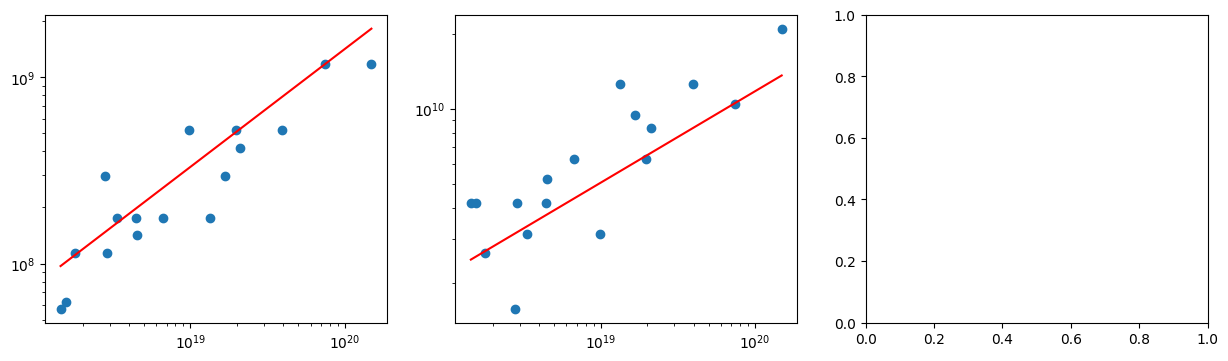

In [69]:
# plotting for N_opt

plt.clf();
fig, ax = plt.subplots(1, 3, figsize=(15, 4));

# C vs N

X = train_df[x_col].values
Y = train_df["N"].values
# slope, intercept = b, G / 6**a

ax[0].scatter(X, Y, label="raw data")
_x_plot = np.linspace(X.min(), X.max(), 100)
ax[0].plot(
    _x_plot, 
    # np.exp(intercept + slope * np.log(_x_plot)), 
    G * (_x_plot / 6) ** a,
    color="red", 
    label="fitted line"
    )
ax[0].loglog()


# C vs D

X = train_df[x_col].values
Y = train_df["D"].values
# slope, intercept = b, G / 6**a

ax[1].scatter(X, Y, label="raw data")
_x_plot = np.linspace(X.min(), X.max(), 100)
ax[1].plot(
    _x_plot, 
    # np.exp(intercept + slope * np.log(_x_plot)), 
    G**-1 * (_x_plot / 6) ** b,
    color="red", 
    label="fitted line"
    )
ax[1].loglog()